In [1]:
#First import relevant packages
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#set plot options to get nicer figures
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100

We create a simple resource competition model, where growth is modeled as:

$dn_i/dt = n_i \cdot (\sum_j x_{ij} * r_j - d)$

$dr_j/dt = r - r_j \cdot \sum_i x_{ij} * n_i + \sum_i p_{ij} * n_i$

where $i$ indicates species, $j$ resource, $x_{ij}$ specifies rate at which species $i$ uses resource $j$ and $p_{ij}$ specifies rate at which species $i$ produces resource $j$.

In this notebook we assume:

- species 1 only uses resource 1, with rate 1, and produces resource 4, with rate 1/d
- species 2 uses resource 2 with rate 1 and resource 4 with rate $x_{bd}$
- species 3 uses resource 3 with rate 1 and resource 4 with rate $x_{cd}$

i.e. the species all have an independent carbon source, species 1 produces a growth enhancer for which species 2 and 3 compete

In mono-culture all species reach density 1/d = 100

## Model definition

In [47]:
#define ODE function, needed by solve_ivp
def ode_fun(t, x, x_bd, x_cd):
    
    x_aa = 1
    x_bb = 1
    x_cc = 1
    
    r = 1
    d = 1E-2
    
    p_ad = 1E-2
    
    na = x[0]
    nb = x[1]
    nc = x[2]
    ra = x[3]
    rb = x[4]
    rc = x[5]
    rd = x[6]
    
    ddt_na = na * (x_aa * ra - d)
    ddt_nb = nb * (x_bb * rb + x_bd * rd - d)
    ddt_nc = nc * (x_cc * rc + x_cd * rd - d)
    
    ddt_ra = r - na * x_aa * ra
    ddt_rb = r - nb * x_bb * rb
    ddt_rc = r - nc * x_cc * rc
    
    ddt_rd = na * p_ad - nb * x_bd * rd - nc * x_cd * rd

    return np.array([ddt_na, ddt_nb, ddt_nc, ddt_ra, ddt_rb, ddt_rc, ddt_rd])
    
    
def run_model(x_0, x_bd, x_cd):
    t_span = (0, 1000)
    t_eval = np.arange(0, 500, 5)  

    x_out = solve_ivp(ode_fun, t_span, x_0, method='RK45', t_eval=t_eval, args=(x_bd, x_cd))
    fig, axs = plt.subplots(1,2)

    axs[0].plot(x_out.t,x_out.y[:3,:].T)
    axs[0].legend(['na','nb','nc'])

    axs[1].plot(x_out.t,x_out.y[3:,:].T)
    axs[1].legend(['ra','rb','rc','rd'])
    
    return x_out.y[:3,-1]



## No growth enhancer

array([99.29977545, 99.29977545, 99.29977545])

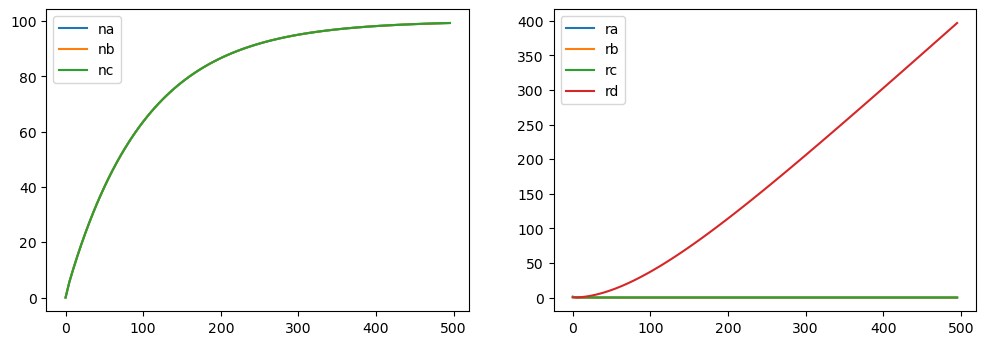

In [48]:
run_model(np.array([1E-3,1E-3,1E-3,1,1,1,0]), 0, 0)

## Co-culture symmetric competition

array([ 99.29977739, 147.21178441, 147.21178441])

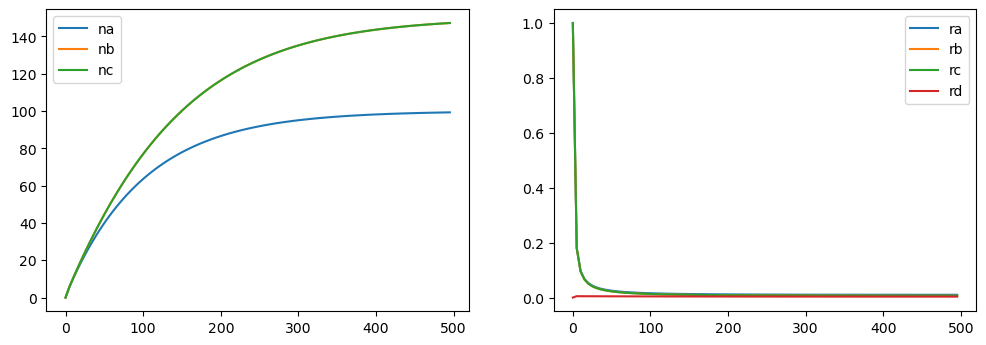

In [49]:
run_model(np.array([1E-3,1E-3,1E-3,1,1,1,0]), 1, 1)

## Co-culture asymmetric competition

array([ 99.29977729, 189.98754539, 104.43602291])

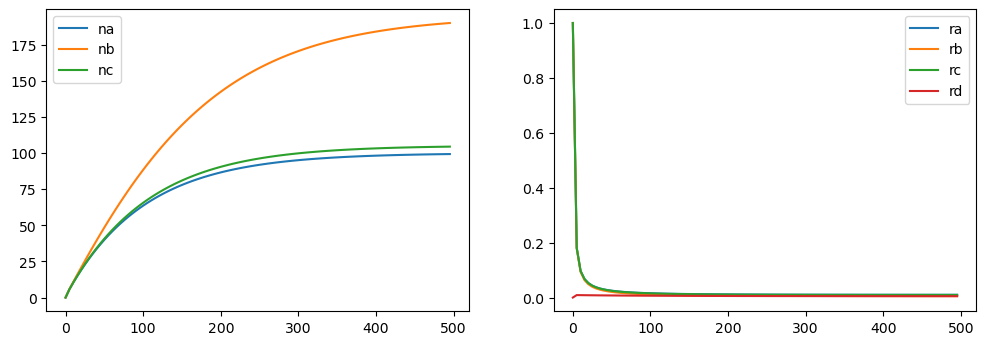

In [50]:
run_model(np.array([1E-3,1E-3,1E-3,1,1,1,0]), 1, 0.1)

## pair-wise cultures symmetric competition

array([ 99.29977754, 195.12378594,   0.        ])

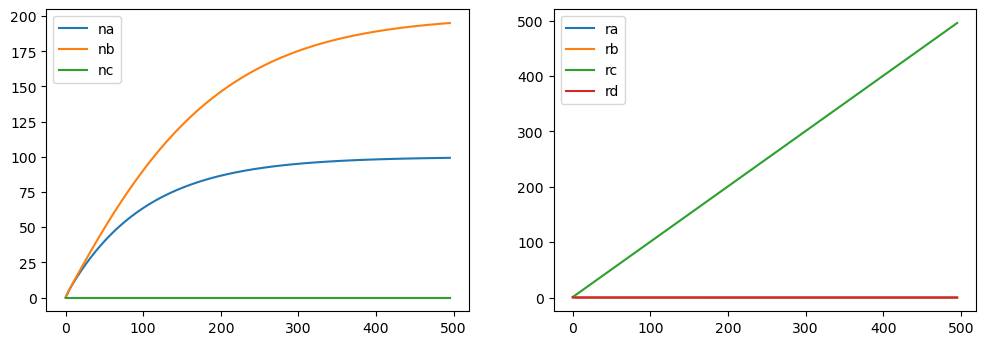

In [51]:
run_model(np.array([1E-3,1E-3,0,1,1,1,0]), 1, 0.1)

array([ 99.29977754,   0.        , 195.12515129])

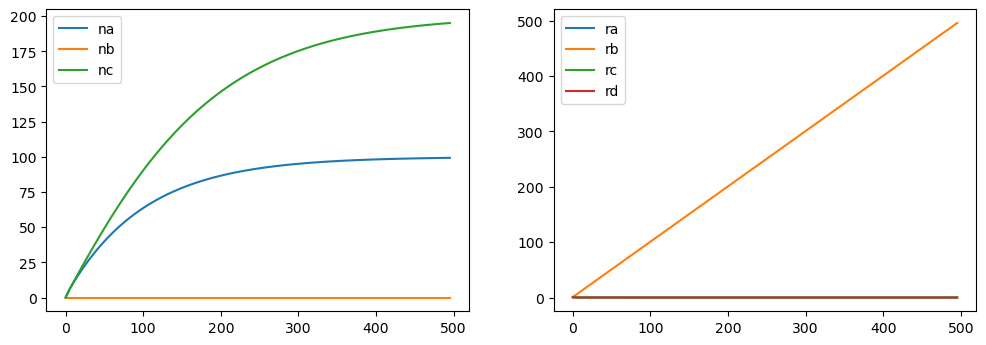

In [52]:
run_model(np.array([1E-3,0,1E-3,1,1,1,0]), 1, 0.1)

array([ 0.        , 99.29977567, 99.29977567])

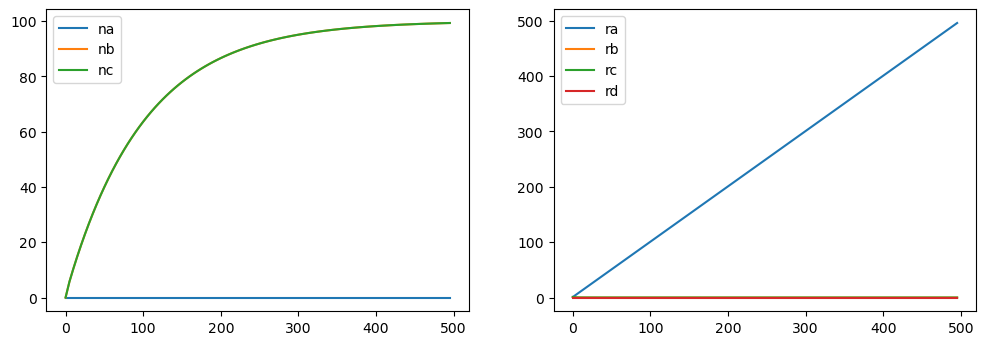

In [53]:
run_model(np.array([0,1E-3,1E-3,1,1,1,0]), 1, 0.1)